<a href="https://colab.research.google.com/github/AXBOUF/python_visulization/blob/main/DATA_ANALYST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Data Analyst Sample dataset:
Number of companies in each city/state
Number of companies vs the year they founded (e.g. can be a Histogram plot)
Size of the company vs the year they founded (You can define arbitrary period for meaningful results, e.g. 1900-1905, 1905-1910 or 1900-1950, 1950-2000)
Average salary vs job title (e.g. can be a Pie plot)
Size of the company vs salary. Is there any difference?
'''

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt





In [ ]:
df = pd.read_csv('DataAnalyst_updated.csv')

In [ ]:
df.drop(columns=df.columns[0], inplace=True)

In [ ]:
df.head()

,Salary Estimate,Company Name,Location,Size,Founded
0,$37K-$66K (Glassdoor est.),Vera Institute of Justice\r\n3.2,"New York, NY",201 to 500 employees,1961
1,$37K-$66K (Glassdoor est.),Visiting Nurse Service of New York\r\n3.8,"New York, NY",10000+ employees,1893
2,$37K-$66K (Glassdoor est.),Squarespace\r\n3.4,"New York, NY",1001 to 5000 employees,2003
3,$37K-$66K (Glassdoor est.),Celerity\r\n4.1,"New York, NY",201 to 500 employees,2002
4,$37K-$66K (Glassdoor est.),FanDuel\r\n3.9,"New York, NY",501 to 1000 employees,2009


In [ ]:
city_state_counts = df.groupby('Location')["Company Name"].count()
arranged_city_state_counts = city_state_counts.sort_values(ascending=False)
arranged_city_state_counts.head(20)


,Company Name
Location,
"New York, NY",210
"Chicago, IL",90
"San Francisco, CA",89
"Austin, TX",62
"Los Angeles, CA",58
"Charlotte, NC",56
"San Diego, CA",52
"Houston, TX",50
"Dallas, TX",48


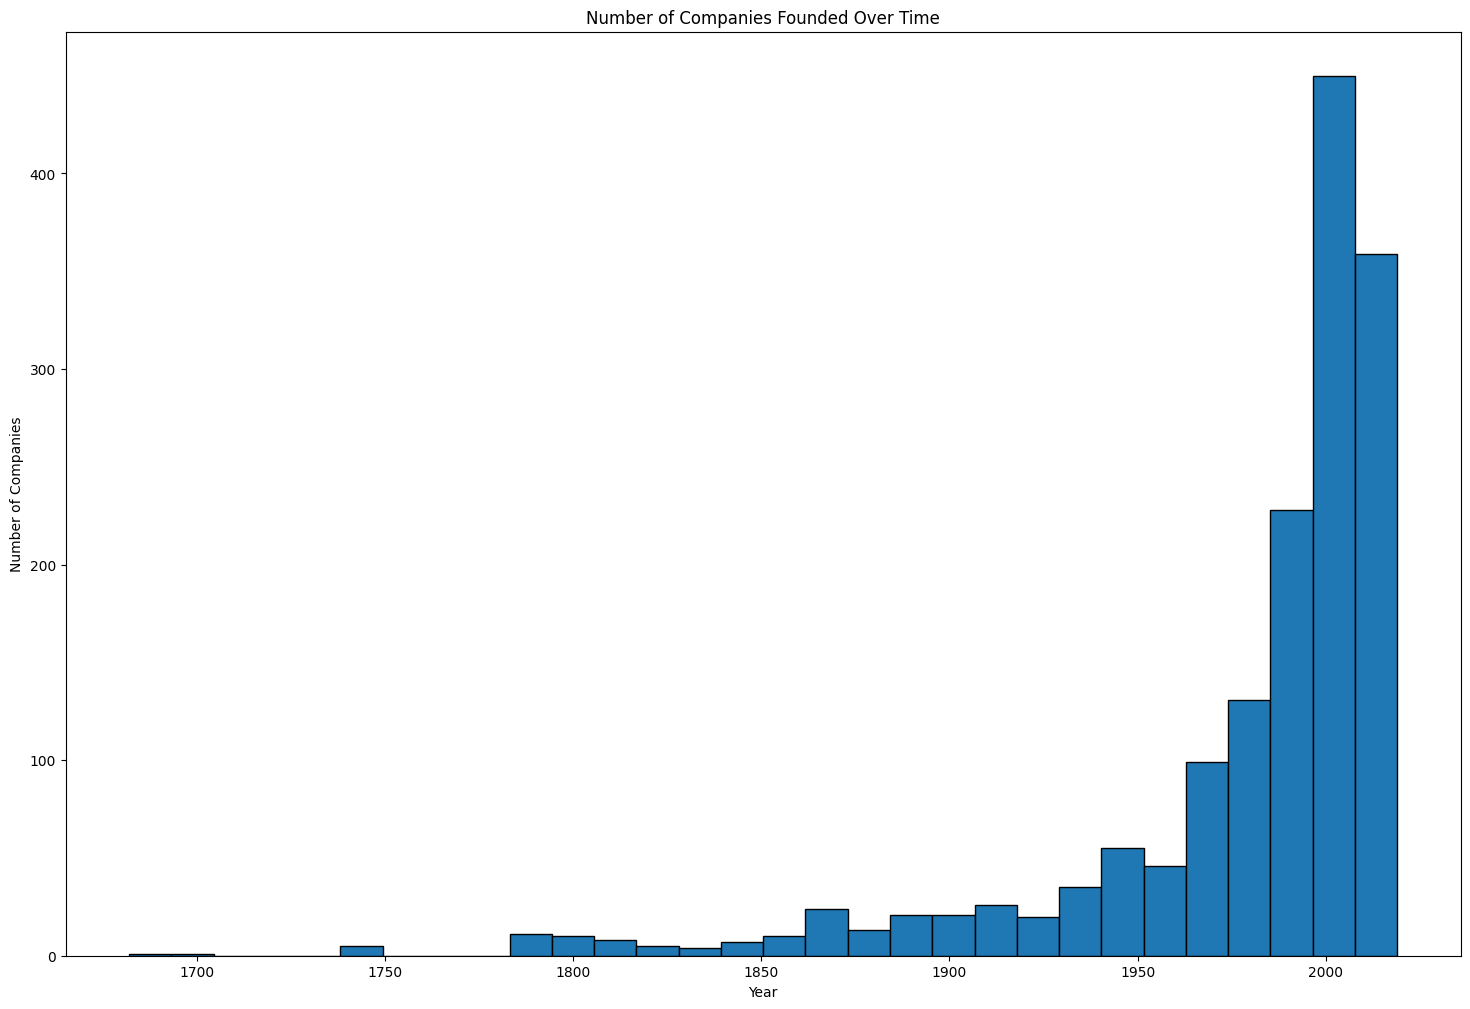

In [ ]:
"Number of companies vs the year they founded (e.g. can be a Histogram plot)"
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
plt.hist(df['Founded'], bins=30, edgecolor='black')
plt.title('Number of Companies Founded Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.show()



In [ ]:
df.Size.unique()

array(['201 to 500 employees', '10000+ employees',
       '1001 to 5000 employees', '501 to 1000 employees',
       '5001 to 10000 employees', '51 to 200 employees',
       '1 to 50 employees'], dtype=object)

/tmp/ipython-input-4263727261.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_by_decade = df.groupby(['decade', 'size_category']).size().unstack().fillna(0)


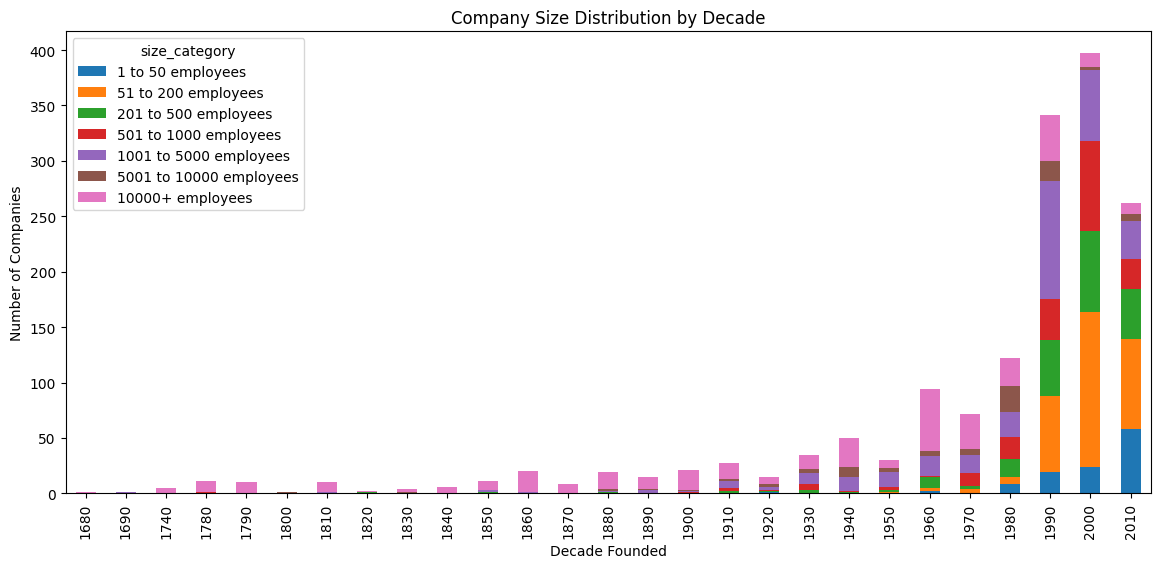

In [ ]:
import seaborn as sns

size_order = [
    '1 to 50 employees',
    '51 to 200 employees',
    '201 to 500 employees',
    '501 to 1000 employees',
    '1001 to 5000 employees',
    '5001 to 10000 employees',
    '10000+ employees'
]
df['size_category'] = pd.Categorical(df['Size'], categories=size_order, ordered=True)
df['decade'] = (df['Founded'] // 10) * 10
size_by_decade = df.groupby(['decade', 'size_category']).size().unstack().fillna(0)

size_by_decade.plot(kind='bar', stacked=True, figsize=(14,6))
plt.xlabel("Decade Founded")
plt.ylabel("Number of Companies")
plt.title("Company Size Distribution by Decade")
plt.show()



In [ ]:
df.head(10)

,Salary Estimate,Company Name,Location,Size,Founded,decade,size_category
0,$37K-$66K (Glassdoor est.),Vera Institute of Justice\r\n3.2,"New York, NY",201 to 500 employees,1961,1960,201 to 500 employees
1,$37K-$66K (Glassdoor est.),Visiting Nurse Service of New York\r\n3.8,"New York, NY",10000+ employees,1893,1890,10000+ employees
2,$37K-$66K (Glassdoor est.),Squarespace\r\n3.4,"New York, NY",1001 to 5000 employees,2003,2000,1001 to 5000 employees
3,$37K-$66K (Glassdoor est.),Celerity\r\n4.1,"New York, NY",201 to 500 employees,2002,2000,201 to 500 employees
4,$37K-$66K (Glassdoor est.),FanDuel\r\n3.9,"New York, NY",501 to 1000 employees,2009,2000,501 to 1000 employees
5,$37K-$66K (Glassdoor est.),Point72\r\n3.9,"New York, NY",1001 to 5000 employees,2014,2010,1001 to 5000 employees
6,$37K-$66K (Glassdoor est.),Two Sigma\r\n4.4,"New York, NY",1001 to 5000 employees,2001,2000,1001 to 5000 employees
7,$37K-$66K (Glassdoor est.),GNY Insurance Companies\r\n3.7,"New York, NY",201 to 500 employees,1914,1910,201 to 500 employees
8,$37K-$66K (Glassdoor est.),DMGT\r\n4.0,"New York, NY",5001 to 10000 employees,1896,1890,5001 to 10000 employees
9,$37K-$66K (Glassdoor est.),Riskified\r\n4.4,"New York, NY",501 to 1000 employees,2013,2010,501 to 1000 employees


In [ ]:
#size of the company vs salary
#clean salary column
df['salary_clean'] = (
    df['Salary Estimate']
    .str.replace(r"\(.*\)", "", regex=True)   # remove "(Glassdoor est.)"
    .str.replace("K", "000")                  # replace K with 000
    .str.replace("\$", "", regex=True)        # remove $
    .str.replace(" ", "")                     # remove spaces
)
df[['salary_min', 'salary_max']] = df['salary_clean'].str.split("-", expand=True)
df['salary_min'] = df['salary_min'].astype(int)
df['salary_max'] = df['salary_max'].astype(int)


df['salary_mid'] = (df['salary_min'] + df['salary_max']) / 2

In [ ]:
print(df.groupby("Size")["salary_mid"].describe())


                         count          mean           std      min      25%  \
Size                                                                           
1 to 50 employees        112.0  75227.678571  22809.422780  33500.0  59375.0   
10000+ employees         367.0  69829.700272  22663.257514  33500.0  55000.0   
1001 to 5000 employees   318.0  72775.157233  23750.953741  33500.0  59000.0   
201 to 500 employees     209.0  71148.325359  24141.699274  33500.0  56000.0   
5001 to 10000 employees   87.0  74086.206897  24923.395064  33500.0  59000.0   
501 to 1000 employees    192.0  72841.145833  25476.290687  33500.0  57500.0   
51 to 200 employees      305.0  72329.508197  24782.218160  33500.0  56000.0   

                             50%      75%       max  
Size                                                 
1 to 50 employees        75500.0  87375.0  138500.0  
10000+ employees         68000.0  78500.0  150000.0  
1001 to 5000 employees   69000.0  80875.0  150000.0  
201 to 50

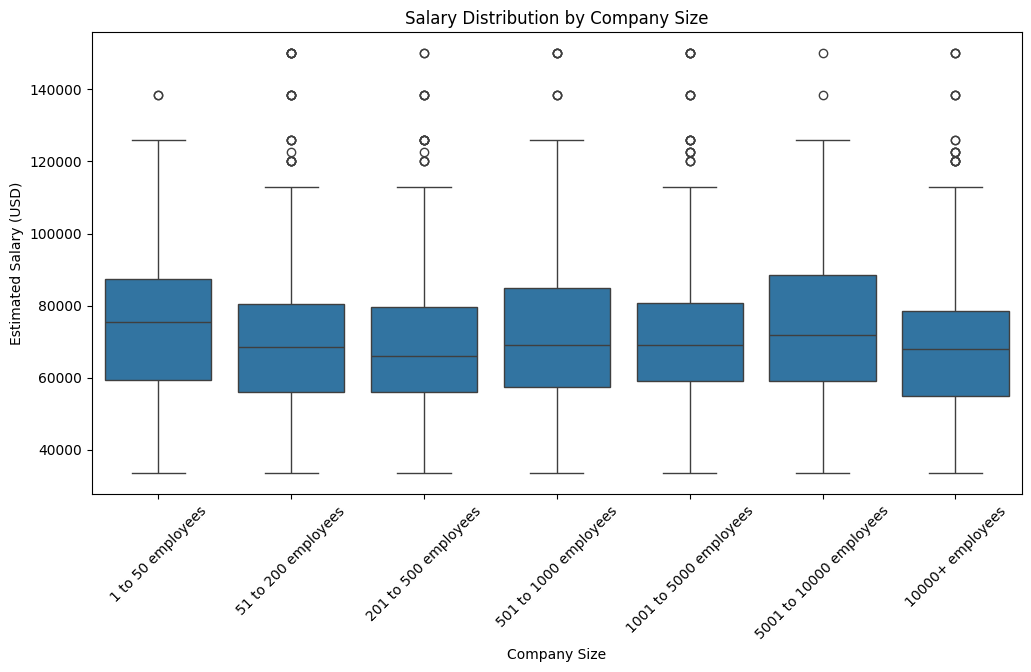

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x="Size", y="salary_mid", data=df,
            order=[
                '1 to 50 employees',
                '51 to 200 employees',
                '201 to 500 employees',
                '501 to 1000 employees',
                '1001 to 5000 employees',
                '5001 to 10000 employees',
                '10000+ employees'
            ])
plt.xticks(rotation=45)
plt.title("Salary Distribution by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Estimated Salary (USD)")
plt.show()


In [ ]:
#NOTE STARTED WITH MANUAL CLEANING IN EXCEL
#REMOVED UNKNOWN VARIABLE AND MULTIPLE -1 OULIERS VALUES